# Read NetCDF-CF using NetCDF4 module

## Purpose

This notebook introduces the netCDF4 module in Python and how to use it. Details about rthis module is available at https://unidata.github.io/netcdf4-python/. 

## Read and check contents

Import the necessary modules to read the data.

In [1]:
import netCDF4 as nc
import numpy as np

Read data from a NetCDF file served over OPeNDAP. The file we are looking at here contains weather station data from Svalbard Lufthavn, Longyearbyen.

In [2]:
myfile = nc.Dataset("https://thredds.met.no/thredds/dodsC/met.no/observations/stations/SN99840.nc")

Check the data model that this file is written in.

In [3]:
myfile.data_model

'NETCDF3_CLASSIC'

Check the structure of the data file. This lists global attributes and variables.

In [4]:
myfile

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    station_name: SVALBARD LUFTHAVN
    wigos_identifier: 0-20000-0-01008
    wmo_identifier: 01008
    date_created: 2019-09-03T09:57:42.519877+00:00
    Conventions: ACDD-1.3,CF-1.6
    title: Observations from station SVALBARD LUFTHAVN SN99840
    institution: Norwegian Meteorological Institute
    source: Meterological surface observation via frost.met.no
    history: 2019-09-03T09:57:42.519877+00:00: frost write netcdf
    references: 
    acknowledgment: frost.met.no
    comment: Observations based on data from frost.met.no
    creator_email: observasjon@met.no
    creator_name: Norwegian Meteorological Institute
    creator_url: https://met.no
    geospatial_bounds: POINT(15.501500 78.245300)
    geospatial_bounds_crs: latlon
    geospatial_lat_max: 78.245300
    geospatial_lat_min: 78.245300
    geospatial_lon_max: 15.501500
    geospatial_lon_min: 15.501500
    id: metno_obs_SN99840
 

Get a list of the global attributes in the file.

In [5]:
myfile.ncattrs()

['station_name',
 'wigos_identifier',
 'wmo_identifier',
 'date_created',
 'Conventions',
 'title',
 'institution',
 'source',
 'history',
 'references',
 'acknowledgment',
 'comment',
 'creator_email',
 'creator_name',
 'creator_url',
 'geospatial_bounds',
 'geospatial_bounds_crs',
 'geospatial_lat_max',
 'geospatial_lat_min',
 'geospatial_lon_max',
 'geospatial_lon_min',
 'id',
 'keywords',
 'metadata_link',
 'summary',
 'time_coverage_start',
 'time_coverage_end',
 'featureType',
 'DODS.strlen',
 'DODS.dimName',
 'DODS_EXTRA.Unlimited_Dimension']

Access a specific global attribute.

In [6]:
myfile.getncattr('title')

'Observations from station SVALBARD LUFTHAVN SN99840'

List all variables that are available in the dataset.

In [7]:
myfile.variables.keys()

dict_keys(['time', 'latitude', 'longitude', 'station_id', 'relative_humidity', 'surface_air_pressure_2m', 'air_temperature_2m', 'wind_from_direction_10m', 'wind_speed_10m', 'air_pressure_at_sea_level', 'air_pressure_at_sea_level_qnh'])

Check a specific variable in more detail.

In [8]:
myfile.variables['air_temperature_2m']

<class 'netCDF4._netCDF4.Variable'>
float32 air_temperature_2m(time)
    long_name: Air temperature
    coverage_content_type: coordinate
    standard_name: air_temperature
    units: K
    _ChunkSizes: 1022
unlimited dimensions: time
current shape = (397152,)
filling off

In [9]:
myfile.variables['air_temperature_2m'].units

'K'

Here _FillValue is not properly set, thus missing values are not automatically identified. Care has to be taken.

## Plot results

We are using matplotlib for this purpose. Check details at https://matplotlib.org/, https://matplotlib.org/stable/tutorials/introductory/pyplot.html, https://realpython.com/python-matplotlib-guide/. 

In [10]:
import matplotlib.pyplot as plt

Convert the time variable to datetime object that is more human readable in plots.

In [11]:
import datetime as dt

To ensure proper conversion of time zone information remember to include.

In [12]:
import pytz

In [13]:
type(myfile.variables['time'])

netCDF4._netCDF4.Variable

In [14]:
mytime = [dt.datetime.fromtimestamp(mt,tz=pytz.timezone("UTC")) for mt in np.array(myfile.variables['time'])]

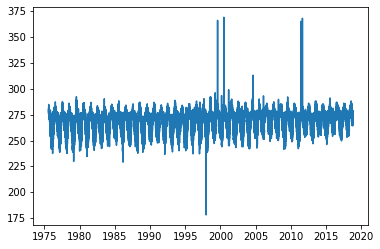

In [15]:
plt.plot(mytime,myfile.variables['air_temperature_2m'])

## Dump your data to CSV

In [16]:
import pandas as pd

In [17]:
mydf = pd.Series(myfile.variables['air_temperature_2m'],mytime)

In [18]:
mydf.head()

1975-08-01 00:00:00+00:00    [278.05, 276.65, 278.25, 278.25, 276.95, 277.3...
1975-08-01 06:00:00+00:00    [278.05, 276.65, 278.25, 278.25, 276.95, 277.3...
1975-08-01 12:00:00+00:00    [278.05, 276.65, 278.25, 278.25, 276.95, 277.3...
1975-08-01 18:00:00+00:00    [278.05, 276.65, 278.25, 278.25, 276.95, 277.3...
1975-08-02 00:00:00+00:00    [278.05, 276.65, 278.25, 278.25, 276.95, 277.3...
dtype: object

In [19]:
mydf.to_csv("myfile.csv", header=None)